# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [ ]:
A[0]

In [ ]:
C[2, 0]

In [ ]:
B[:, 0]

### Elementwise operations

In [ ]:
3 * A

In [ ]:
A + A

In [ ]:
A * A

In [ ]:
A / A

In [ ]:
A - A

In [ ]:
A + B

In [ ]:
A * B

### Dot product

In [ ]:
A.shape

In [ ]:
B.shape

In [ ]:
A.dot(B)

In [ ]:
np.dot(A, B)

In [ ]:
B.dot(A)

In [ ]:
C.shape

In [ ]:
A.shape

In [ ]:
C.dot(A)

In [ ]:
A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [7]:
df = pd.read_csv('../data/banknotes.csv')

In [8]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [10]:
import seaborn as sns

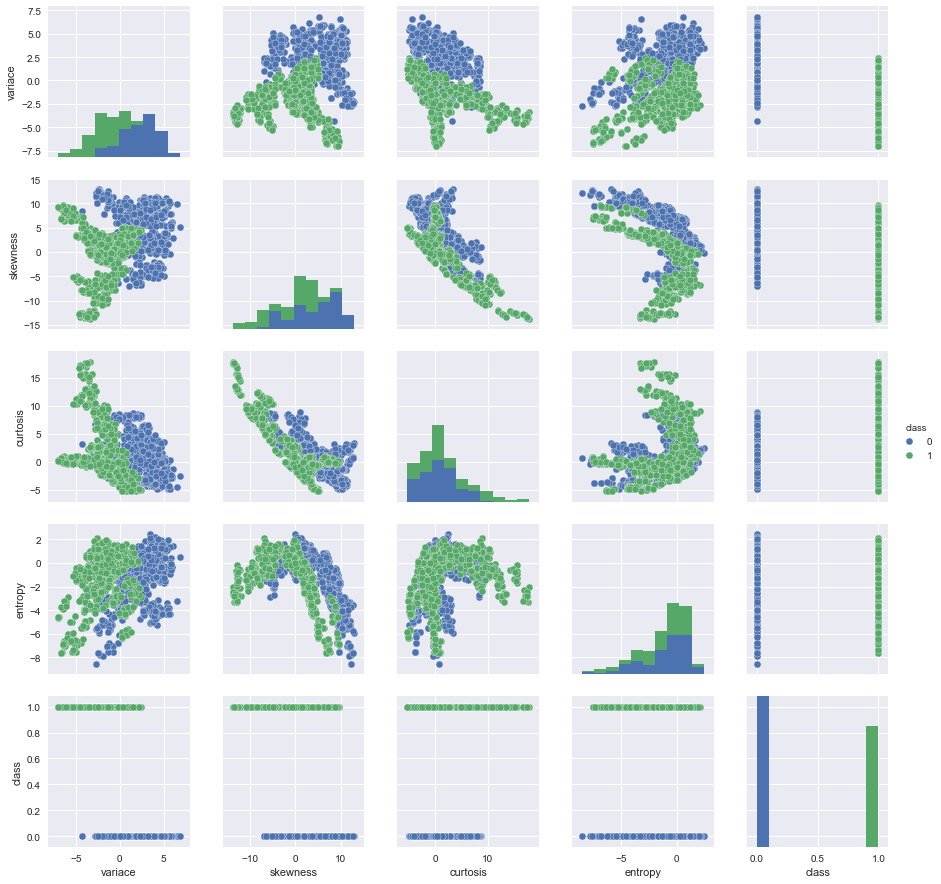

In [11]:
sns.pairplot(df, hue="class")

#### Baseline model

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [13]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [14]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.99124726,  0.99562363])

### Logistic Regression Model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [27]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [28]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.5780 - acc: 0.7000     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.5268 - acc: 0.7375     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.4865 - acc: 0.7948     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.4544 - acc: 0.8365     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.4285 - acc: 0.8677     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.4074 - acc: 0.8792     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.3897 - acc: 0.8885     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.3747 - acc: 0.8927     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.3619 - acc: 0.9021     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [29]:
historydf = pd.DataFrame(history.history, index=history.epoch)

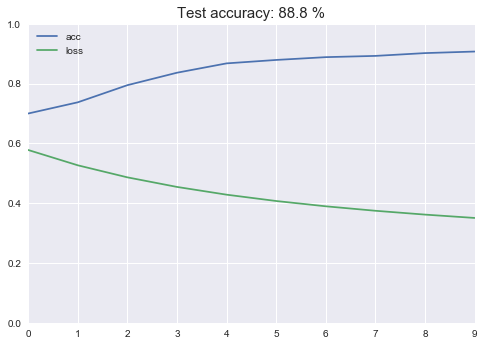

In [30]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [31]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [32]:
historydf = pd.concat(dflist, axis=1)

In [33]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.835417,0.496831,0.727083,0.575775,0.637500,0.610724,0.922917,0.251162
1,0.884375,0.445948,0.834375,0.425644,0.880208,0.350723,0.962500,0.125285
2,0.897917,0.409318,0.876042,0.354585,0.930208,0.260925,0.975000,0.094698
3,0.908333,0.381366,0.901042,0.307201,0.944792,0.210953,0.978125,0.080039
4,0.911458,0.359033,0.913542,0.272055,0.961458,0.179379,0.977083,0.071242
5,0.919792,0.340559,0.922917,0.244575,0.963542,0.157601,0.979167,0.065096
6,0.931250,0.324869,0.931250,0.222507,0.967708,0.141710,0.980208,0.060707
7,0.931250,0.311254,0.934375,0.204373,0.967708,0.129639,0.979167,0.057226
8,0.933333,0.299263,0.944792,0.189311,0.968750,0.120185,0.981250,0.054701
9,0.932292,0.288563,0.950000,0.176623,0.969792,0.112524,0.981250,0.052538


In [34]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [35]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.835417  0.496831  0.727083  0.575775  0.637500  0.610724   
1              0.884375  0.445948  0.834375  0.425644  0.880208  0.350723   
2              0.897917  0.409318  0.876042  0.354585  0.930208  0.260925   
3              0.908333  0.381366  0.901042  0.307201  0.944792  0.210953   
4              0.911458  0.359033  0.913542  0.272055  0.961458  0.179379   
5              0.919792  0.340559  0.922917  0.244575  0.963542  0.157601   
6              0.931250  0.324869  0.931250  0.222507  0.967708  0.141710   
7              0.931250  0.311254  0.934375  0.204373  0.967708  0.129639   
8              0.933333  0.299263  0.944792  0.189311  0.968750  0.120185   
9              0.932292  0.288563  0.950000  0.176623  0.969792  0.112524   

learning_rate      0.50            
metric              acc      loss  
0              0.922917  0.251162  
1              0.962500  0.125285  
2              0.975000  0.094698  
3              0.978125  0.080039  
4              0.977083  0.071242  
5              0.979167  0.065096  
6              0.980208  0.060707  
7              0.979167  0.057226  
8              0.981250  0.054701  
9              0.981250  0.052538

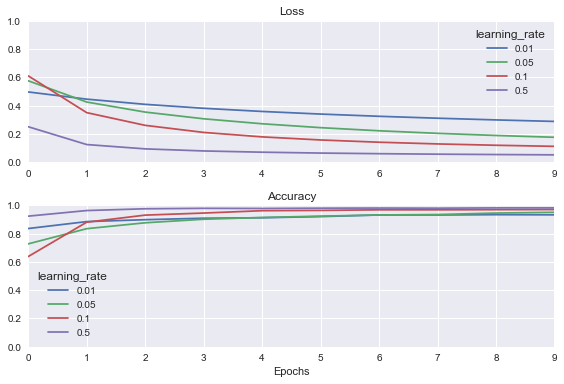

In [36]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [37]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [38]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [39]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.791667  0.478376  0.165625  1.361613  0.677083  0.587222   
1           0.809375  0.451968  0.176042  1.203893  0.692708  0.574959   
2           0.819792  0.430100  0.197917  1.069940  0.703125  0.563435   
3           0.823958  0.411424  0.230208  0.960056  0.712500  0.552565   
4           0.830208  0.395056  0.329167  0.871157  0.720833  0.542295   
5           0.841667  0.380365  0.423958  0.800009  0.736458  0.532602   
6           0.851042  0.367097  0.479167  0.742691  0.744792  0.523447   
7           0.855208  0.354929  0.535417  0.695766  0.759375  0.514724   
8           0.859375  0.343691  0.587500  0.656807  0.765625  0.506472   
9           0.866667  0.333250  0.618750  0.623954  0.778125  0.498629   

batch_size       128            
metric           acc      loss  
0           0.116667  1.104660  
1           0.120833  1.071944  
2           0.117708  1.040992  
3           0.115625  1.011464  
4           0.114583  0.983402  
5           0.115625  0.956420  
6           0.130208  0.931053  
7           0.140625  0.906894  
8           0.160417  0.884239  
9           0.191667  0.862535

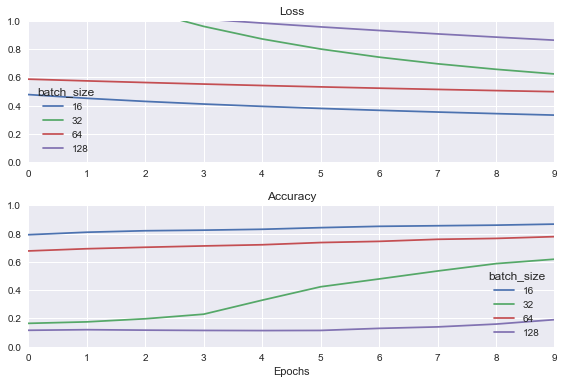

In [40]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [41]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [42]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [43]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

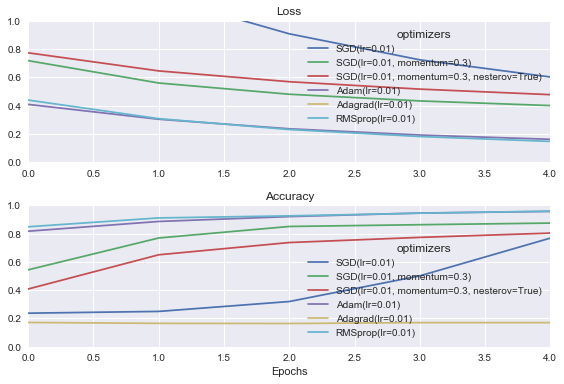

In [44]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [ ]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

In [ ]:
result

In [ ]:
model.summary()

In [ ]:
model.layers

In [ ]:
inp = model.layers[0].input
out = model.layers[0].output

In [ ]:
inp

In [ ]:
out

In [ ]:
features_function = K.function([inp], [out])

In [ ]:
features_function

In [ ]:
features_function([X_test])[0].shape

In [ ]:
features = features_function([X_test])[0]

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

In [ ]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [48]:
df = pd.read_csv('../data/wines.csv')

In [50]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [51]:
df['Class'].unique()

array([1, 2, 3])

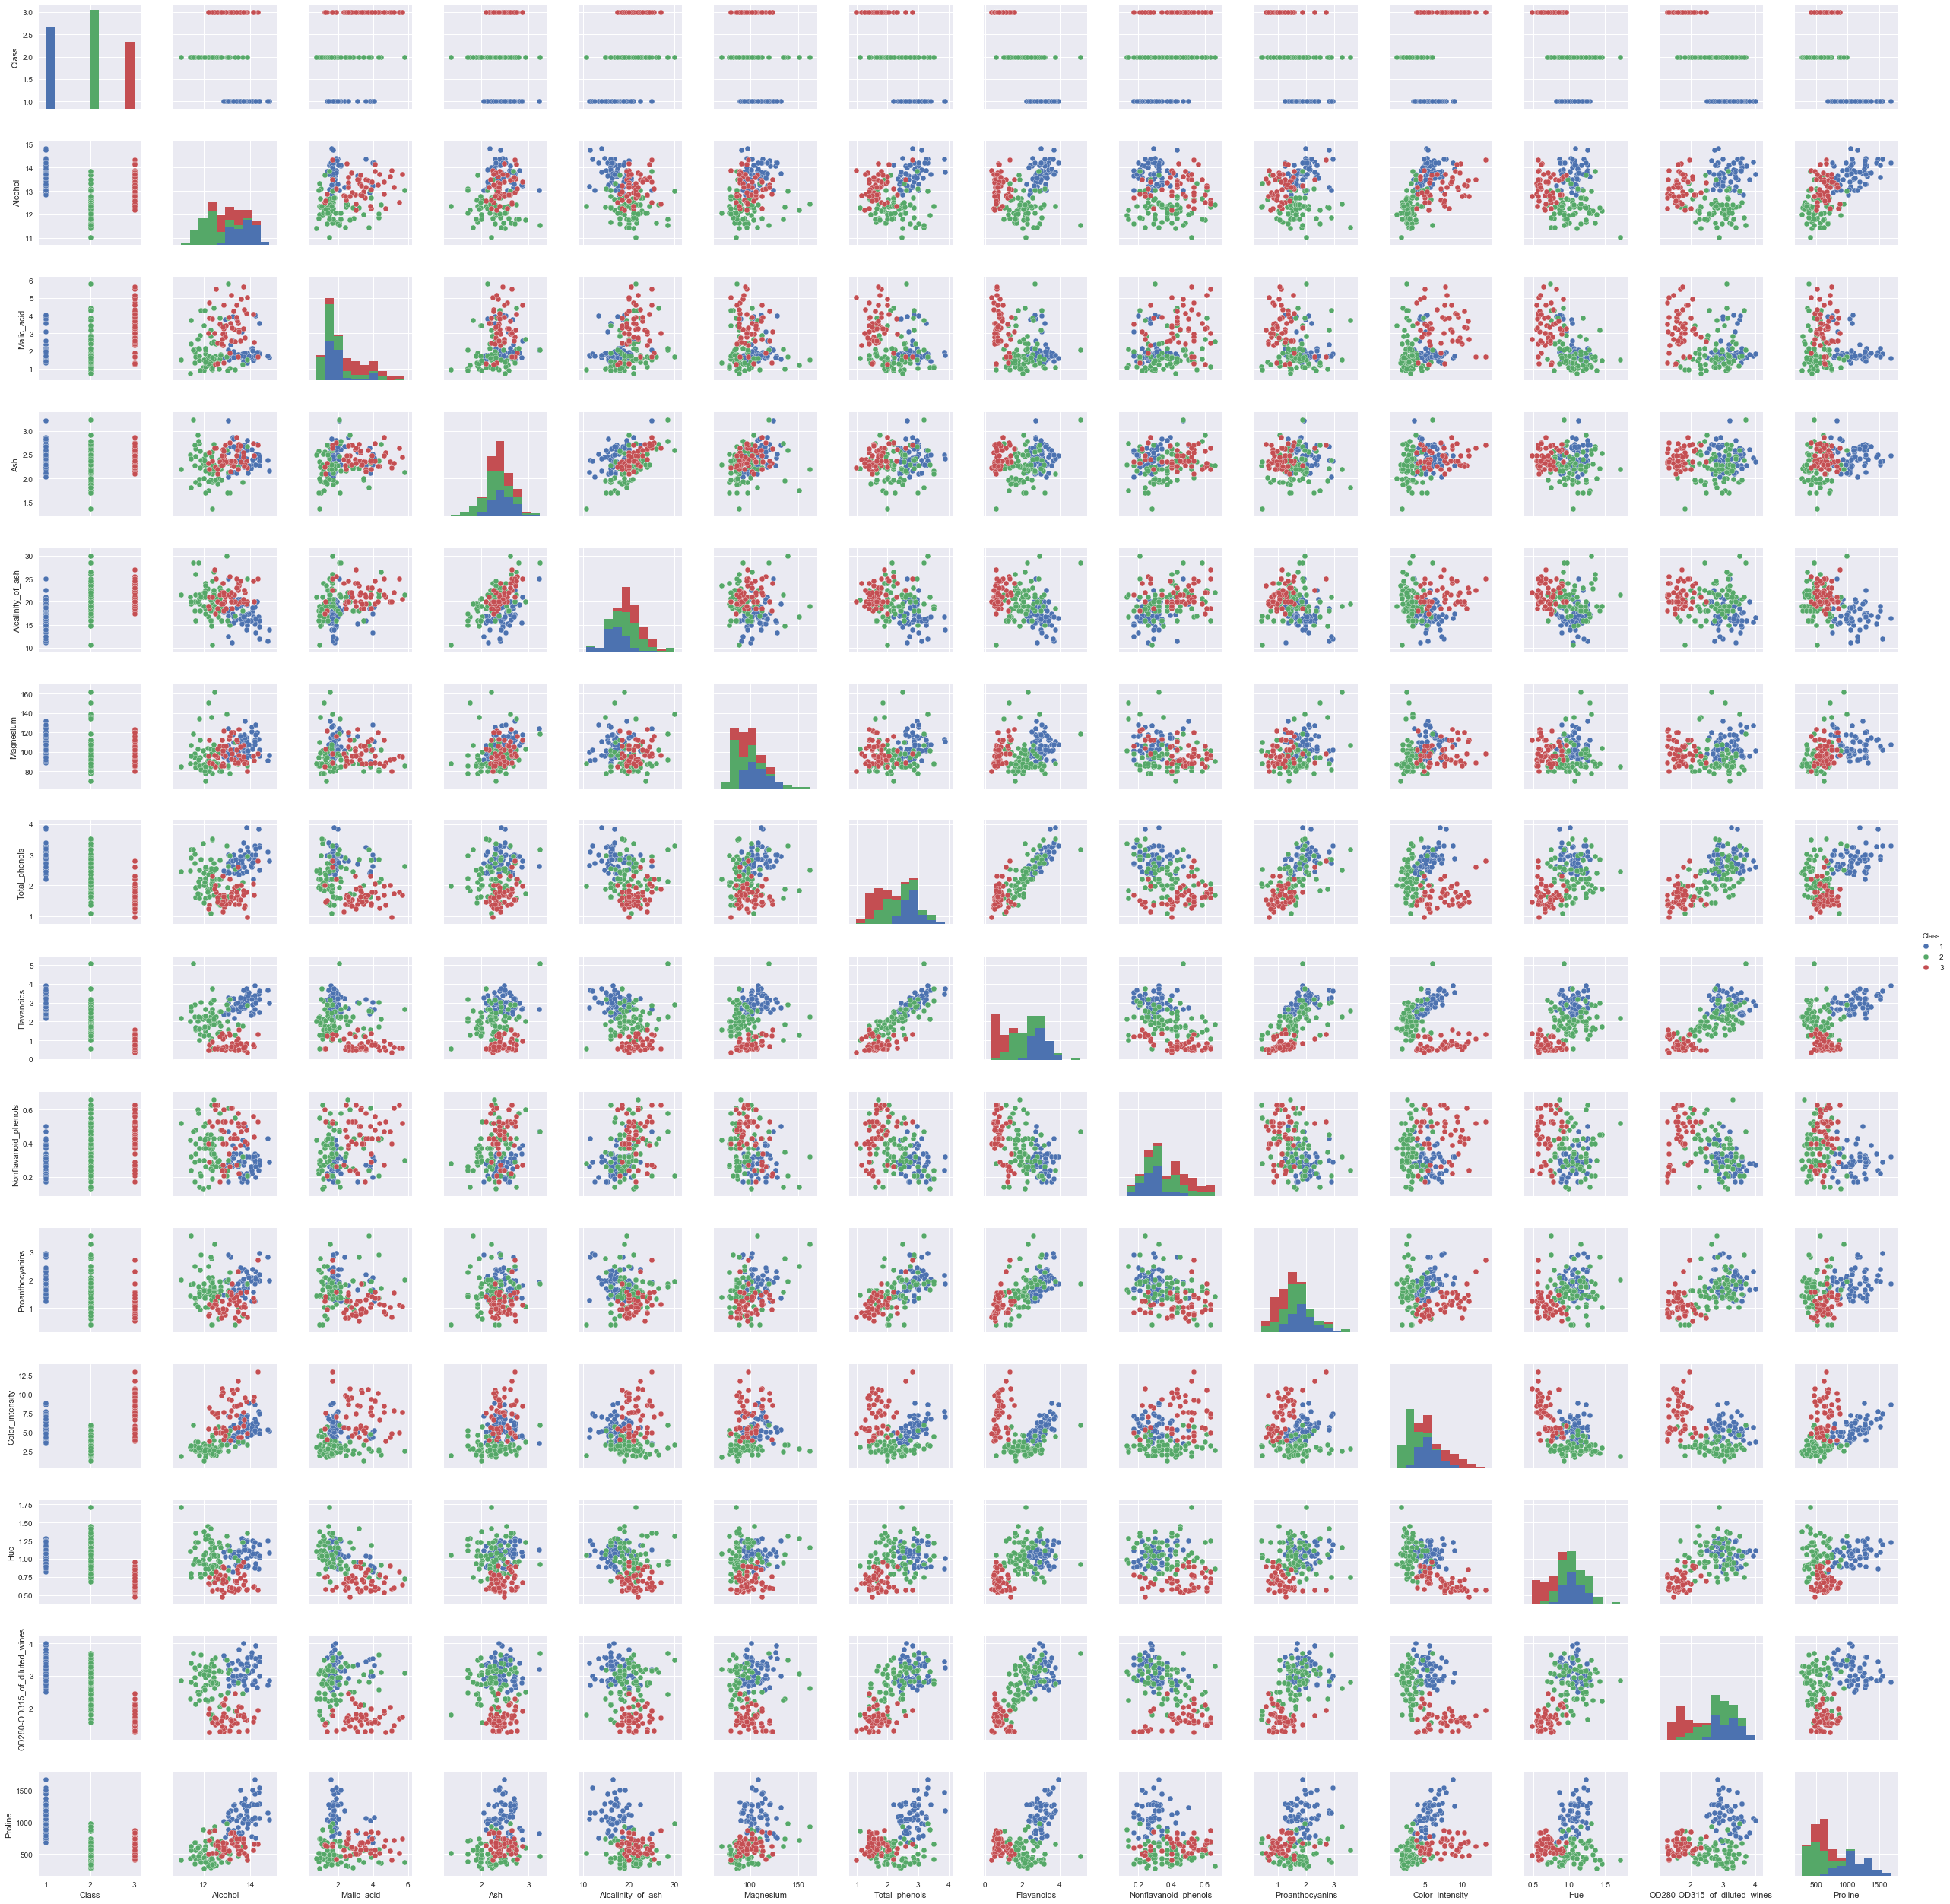

In [59]:
sns.pairplot(data = df, hue = 'Class')

In [141]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.optimizers import RMSprop

In [74]:
X = df.drop(['Class'], axis = 1)
y = df['Class']-1

In [75]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [77]:
y_cat = to_categorical(y)

In [143]:
model = Sequential()
model.add(Dense(5, input_dim = X_sc.shape[1], activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = RMSprop(lr=0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [144]:
h = model.fit(X_sc, y_cat, batch_size = 8, epochs = 10, verbose = 1, validation_split = 0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 0s - loss: 0.4166 - acc: 0.8169 - val_loss: 0.0377 - val_acc: 0.9722
Epoch 2/10
142/142 [==============================] - 0s - loss: 0.1428 - acc: 0.9507 - val_loss: 1.5793e-05 - val_acc: 1.0000
Epoch 3/10
142/142 [==============================] - 0s - loss: 0.0597 - acc: 0.9718 - val_loss: 1.9449e-04 - val_acc: 1.0000
Epoch 4/10
142/142 [==============================] - 0s - loss: 0.0848 - acc: 0.9648 - val_loss: 0.0229 - val_acc: 0.9722
Epoch 5/10
142/142 [==============================] - 0s - loss: 0.0514 - acc: 0.9859 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 6/10
142/142 [==============================] - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 7/10
142/142 [==============================] - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 8.9681e-04 - val_acc: 1.0000
Epoch 8/10
142/142 [==============================] - 0s - loss: 0.0457 - acc: 0.9

In [145]:
h.history.keys()

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])

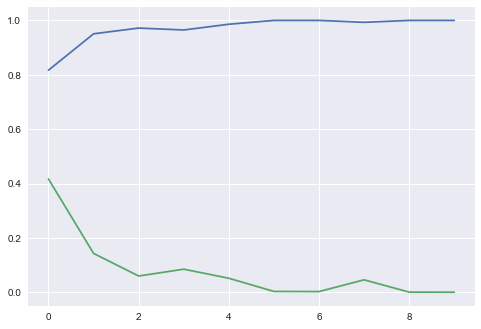

In [146]:
plt.plot(h.epoch, h.history['acc'])
plt.plot(h.epoch, h.history['loss'])
plt.show()

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [149]:
model = Sequential()
model.add(Dense(8, input_dim = X_sc.shape[1], activation = 'tanh', kernel_initializer = 'he_normal'))
model.add(Dense(5, activation = 'tanh', kernel_initializer = 'he_normal'))
model.add(Dense(2, activation = 'tanh', kernel_initializer = 'he_normal'))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = RMSprop(lr=0.05), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [150]:
h = model.fit(X_sc, y_cat, batch_size = 16, epochs = 20, verbose = 1)

Epoch 1/20
178/178 [==============================] - 0s - loss: 0.6489 - acc: 0.7584     
Epoch 2/20
178/178 [==============================] - 0s - loss: 0.2438 - acc: 0.9607     
Epoch 3/20
178/178 [==============================] - 0s - loss: 0.1323 - acc: 0.9831     
Epoch 4/20
178/178 [==============================] - 0s - loss: 0.0877 - acc: 0.9831     
Epoch 5/20
178/178 [==============================] - 0s - loss: 0.0751 - acc: 0.9888     
Epoch 6/20
178/178 [==============================] - 0s - loss: 0.0433 - acc: 0.9944     
Epoch 7/20
178/178 [==============================] - 0s - loss: 0.0792 - acc: 0.9775     
Epoch 8/20
178/178 [==============================] - 0s - loss: 0.0184 - acc: 1.0000     
Epoch 9/20
178/178 [==============================] - 0s - loss: 0.0073 - acc: 1.0000     
Epoch 10/20
178/178 [==============================] - 0s - loss: 0.0045 - acc: 1.0000     
Epoch 11/20
178/178 [==============================] - 0s - loss: 0.0028 - acc: 1.0000   

In [151]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_61 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_63 (Dense)             (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [154]:
inp = model.layers[0].input
out = model.layers[2].output

In [155]:
features_function = K.function([inp], [out])

In [163]:
features = features_function([X_sc])[0]

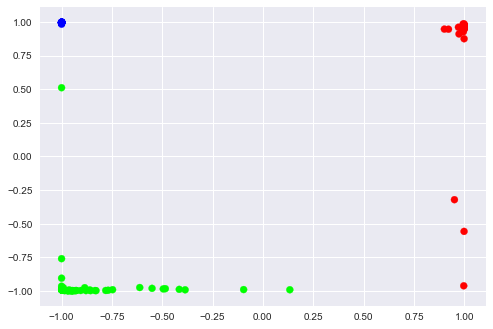

In [164]:
plt.scatter(features[:,0], features[:,1], c=y_cat)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [165]:
from keras.layers import Input
from keras.models import Model

In [172]:
K.clear_session()

inputs = Input(shape=(X_sc.shape[1],))

x = Dense(8, kernel_initializer = 'he_normal', activation = 'tanh')(inputs)
x = Dense(5, kernel_initializer = 'he_normal', activation = 'tanh')(x)
second_to_last = Dense(2, kernel_initializer = 'he_normal', activation = 'tanh')(x)
outputs = Dense(3, activation = 'softmax')(second_to_last)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = RMSprop(lr=0.05), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [173]:
model.fit(X_sc, y_cat, batch_size = 16, epochs = 20, verbose = 1)

Epoch 1/20
178/178 [==============================] - 0s - loss: 0.6331 - acc: 0.7640     
Epoch 2/20
178/178 [==============================] - 0s - loss: 0.2110 - acc: 0.9663     
Epoch 3/20
178/178 [==============================] - 0s - loss: 0.1387 - acc: 0.9775     
Epoch 4/20
178/178 [==============================] - 0s - loss: 0.0900 - acc: 0.9831     
Epoch 5/20
178/178 [==============================] - 0s - loss: 0.0672 - acc: 0.9888     
Epoch 6/20
178/178 [==============================] - 0s - loss: 0.0369 - acc: 0.9888     
Epoch 7/20
178/178 [==============================] - 0s - loss: 0.0445 - acc: 0.9888     
Epoch 8/20
178/178 [==============================] - 0s - loss: 0.0089 - acc: 1.0000     
Epoch 9/20
178/178 [==============================] - 0s - loss: 0.0053 - acc: 1.0000     
Epoch 10/20
178/178 [==============================] - 0s - loss: 0.0032 - acc: 1.0000     
Epoch 11/20
178/178 [==============================] - 0s - loss: 0.0019 - acc: 1.0000   

In [175]:
features_function = K.function([inputs], [second_to_last])

In [177]:
features = features_function([X_sc])[0]

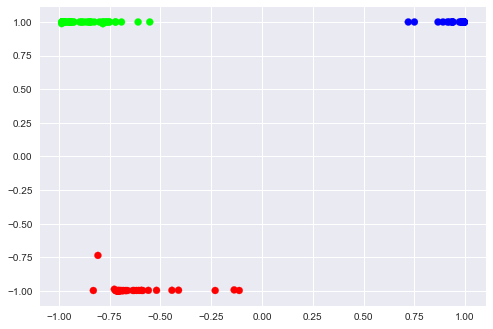

In [178]:
plt.scatter(features[:, 0], features[:, 1], c = y_cat)

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [208]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split

In [209]:
checkpointer = ModelCheckpoint(filepath = '/tmp/udemy/weights.hdf5', verbose = 1, save_best_only = True)
earlystopper = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 1, verbose = 1, mode = 'auto')
tensorboard = TensorBoard(log_dir = '/tmp/udemy/tensorboard/')

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_cat, test_size = 0.3, random_state = 42)

In [211]:
K.clear_session()

inputs = Input(shape=(X_sc.shape[1],))

x = Dense(8, kernel_initializer = 'he_normal', activation = 'tanh')(inputs)
x = Dense(5, kernel_initializer = 'he_normal', activation = 'tanh')(x)
second_to_last = Dense(2, kernel_initializer = 'he_normal', activation = 'tanh')(x)
outputs = Dense(3, activation = 'softmax')(second_to_last)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = RMSprop(lr=0.05), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [212]:
model.fit(X_train
          , y_train
          , batch_size = 32
          , epochs = 20
          , verbose = 2
          , validation_data = (X_test, y_test)
          , callbacks = [earlystopper, tensorboard, checkpointer])

Train on 124 samples, validate on 54 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.52802, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.8389 - acc: 0.6371 - val_loss: 0.5280 - val_acc: 0.9444
Epoch 2/20
Epoch 00001: val_loss improved from 0.52802 to 0.36633, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.5100 - acc: 0.8710 - val_loss: 0.3663 - val_acc: 0.9444
Epoch 3/20
Epoch 00002: val_loss improved from 0.36633 to 0.23145, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.3221 - acc: 0.9597 - val_loss: 0.2314 - val_acc: 0.9815
Epoch 4/20
Epoch 00003: val_loss improved from 0.23145 to 0.20844, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.2333 - acc: 0.9677 - val_loss: 0.2084 - val_acc: 0.9444
Epoch 5/20
Epoch 00004: val_loss improved from 0.20844 to 0.16606, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.1696 - acc: 0.9839 - val_loss: 0.1661 - val_acc: 0.9630
Epoch 6/20
Epoch 00005: val_loss did not improve
0s - loss: 0.1542 - acc: 0.975

In [ ]:
## on terminal: tensorboar --logdir = '/tmp/udemy/tensorboard/'